# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [143]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [144]:
creditcard_df.shape

(8950, 18)

In [145]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [146]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [147]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [148]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [149]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [150]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

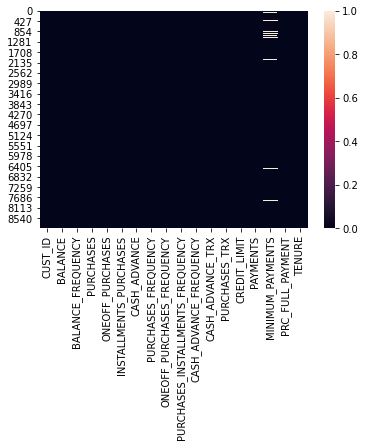

In [151]:
sns.heatmap(creditcard_df.isnull());

In [152]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [153]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [154]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [155]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [156]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [157]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

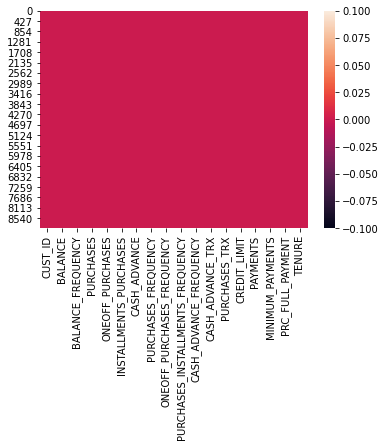

In [158]:
sns.heatmap(creditcard_df.isnull());

In [159]:
creditcard_df.duplicated().sum()

0

In [160]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [161]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [162]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [163]:
len(creditcard_df.columns)

17

c:\users\fabri\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\fabri\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\fabri\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

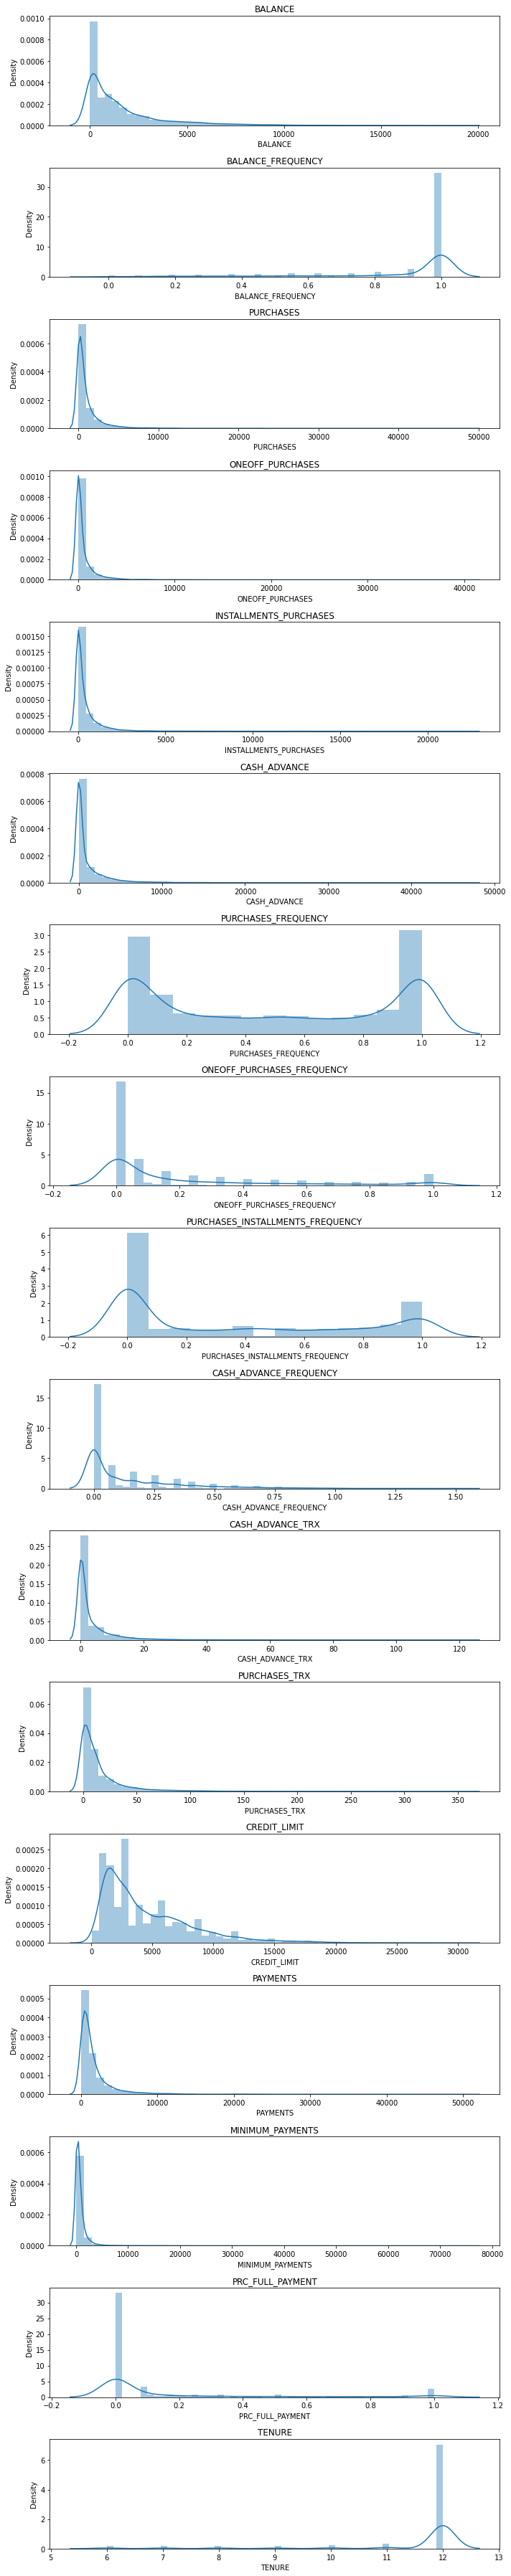

In [164]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [165]:
correlations = creditcard_df.corr()

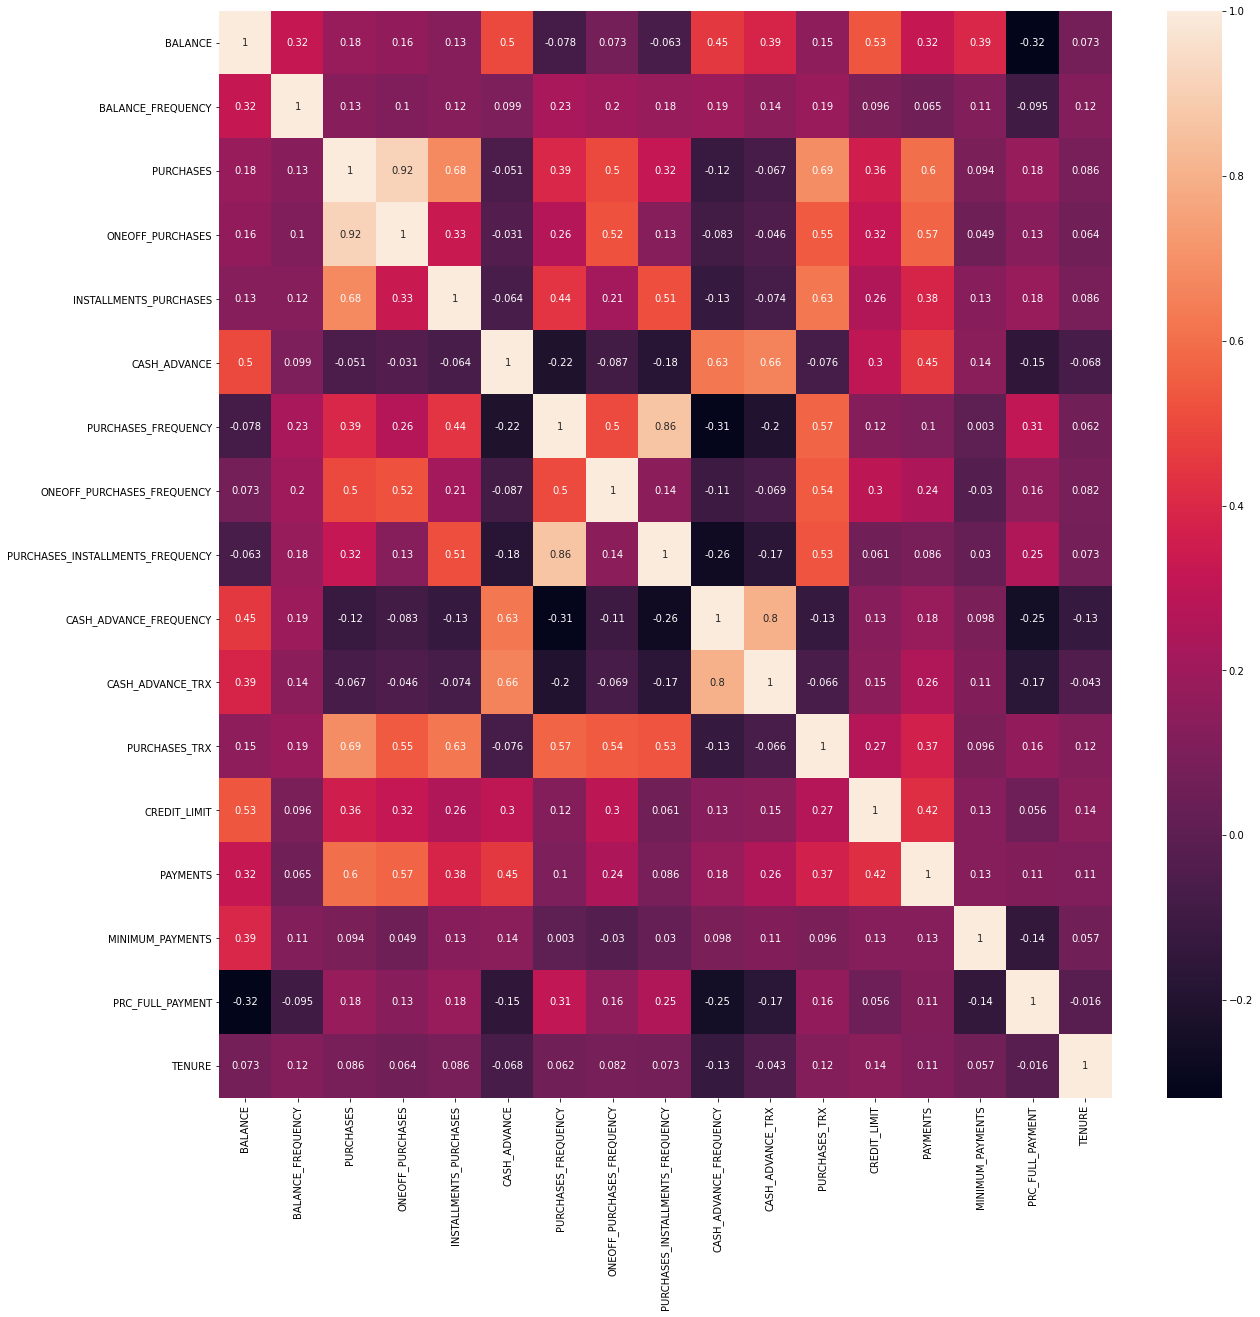

In [166]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [167]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [168]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [169]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [170]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [171]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [172]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [173]:
print(wcss_1)

[152149.99999999878, 127785.04965248294, 111986.21731077052, 99073.93826774781, 91502.92043249513, 84852.48921956705, 79527.46296088722, 74489.45621471884, 69856.90727511494, 66478.97062948962, 63636.77660205891, 61353.65621814392, 59145.20220523971, 57466.28263261116, 55850.030034938216, 54274.31855918709, 53226.82170684728, 52309.03994062172, 50687.98036100839]


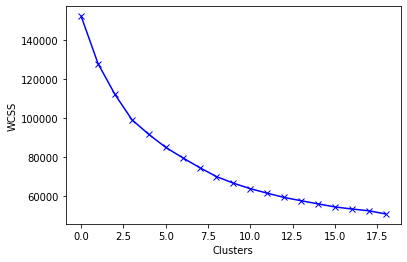

In [174]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [175]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [176]:
labels, len(labels)

(array([1, 3, 4, ..., 5, 5, 5]), 8950)

In [177]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 327, 2760, 2015,  892, 1125,  626, 1182,   23], dtype=int64))

In [178]:
kmeans.cluster_centers_

array([[ 1.11026335e+00,  4.75717750e-01,  2.57122046e+00,
         1.83777544e+00,  2.70340544e+00, -1.25135782e-01,
         1.17040780e+00,  1.55159168e+00,  1.29474229e+00,
        -2.65418232e-01, -1.24742114e-01,  3.22316609e+00,
         1.33078546e+00,  1.51326727e+00,  8.09453729e-01,
         2.37560018e-01,  3.35542991e-01],
       [ 5.61897387e-03,  4.03109070e-01, -3.54194241e-01,
        -2.38721609e-01, -3.98803760e-01, -1.04880864e-01,
        -8.41244833e-01, -3.82925347e-01, -7.51490197e-01,
         8.57905826e-02, -4.09765829e-02, -4.77765840e-01,
        -3.07965250e-01, -2.52996477e-01, -1.29846823e-02,
        -4.55064635e-01,  2.74011484e-01],
       [-3.61001317e-01,  3.31862014e-01, -3.03776575e-02,
        -2.40323784e-01,  3.69493999e-01, -3.61645266e-01,
         9.95820694e-01, -3.79568402e-01,  1.20654662e+00,
        -4.71489521e-01, -3.59189979e-01,  1.94171522e-01,
        -2.59765694e-01, -2.13074132e-01, -5.07861169e-02,
         3.15092789e-01,  2.5

In [179]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.110263,0.475718,2.571220,1.837775,2.703405,-0.125136,1.170408,1.551592,1.294742,-0.265418,-0.124742,3.223166,1.330785,1.513267,0.809454,0.237560,0.335543
1,0.005619,0.403109,-0.354194,-0.238722,-0.398804,-0.104881,-0.841245,-0.382925,-0.751490,0.085791,-0.040977,-0.477766,-0.307965,-0.252996,-0.012985,-0.455065,0.274011
2,-0.361001,0.331862,-0.030378,-0.240324,0.369494,-0.361645,0.995821,-0.379568,1.206547,-0.471490,-0.359190,0.194172,-0.259766,-0.213074,-0.050786,0.315093,0.255413
3,1.656217,0.395783,-0.222410,-0.157674,-0.236277,1.981743,-0.484903,-0.210869,-0.425729,1.914764,1.910513,-0.271657,1.002481,0.786834,0.513477,-0.396038,0.073665
4,-0.119916,0.402597,0.580482,0.704295,0.078431,-0.332989,0.998230,1.914630,0.212651,-0.422462,-0.336574,0.665146,0.469246,0.173099,-0.156051,0.463739,0.274920
5,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
6,-0.700731,-2.141584,-0.309691,-0.234253,-0.301781,-0.320253,-0.553630,-0.441117,-0.438908,-0.521281,-0.376272,-0.418413,-0.173871,-0.191271,-0.256617,0.286478,0.202634
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [180]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3875.394281,0.989964,6496.656972,3642.768196,2855.723639,716.455532,0.960092,0.665328,0.879001,0.082031,2.397554,94.825688,9336.391437,6113.904331,2750.604313,0.223197,11.966361
1,1576.170247,0.972764,246.463378,196.208394,50.434353,758.931040,0.152718,0.088224,0.065776,0.152312,2.969192,2.834360,3373.945874,1000.743840,833.946288,0.020616,11.884016
2,813.081059,0.955886,938.302500,193.549112,745.196483,220.484095,0.890022,0.089225,0.843950,0.040794,0.797619,19.536210,3549.315576,1116.315119,745.851639,0.245874,11.859127
3,5011.751567,0.971028,528.022564,330.730694,197.405722,5134.679615,0.295736,0.139551,0.195242,0.518308,16.286674,7.957447,8141.886389,4010.952329,2060.843739,0.037880,11.615901
4,1314.879752,0.972642,2243.414511,1761.422598,481.991913,280.576637,0.890989,0.773629,0.448950,0.050605,0.951957,31.242883,6201.759139,2234.247475,500.535333,0.289350,11.885231
5,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
6,105.961945,0.369949,341.545474,203.625880,138.170694,307.286565,0.268152,0.070864,0.190004,0.030830,0.681049,4.309645,3861.835401,1179.432233,266.170994,0.237505,11.788494
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [181]:
labels, len(labels)

(array([1, 3, 4, ..., 5, 5, 5]), 8950)

In [182]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


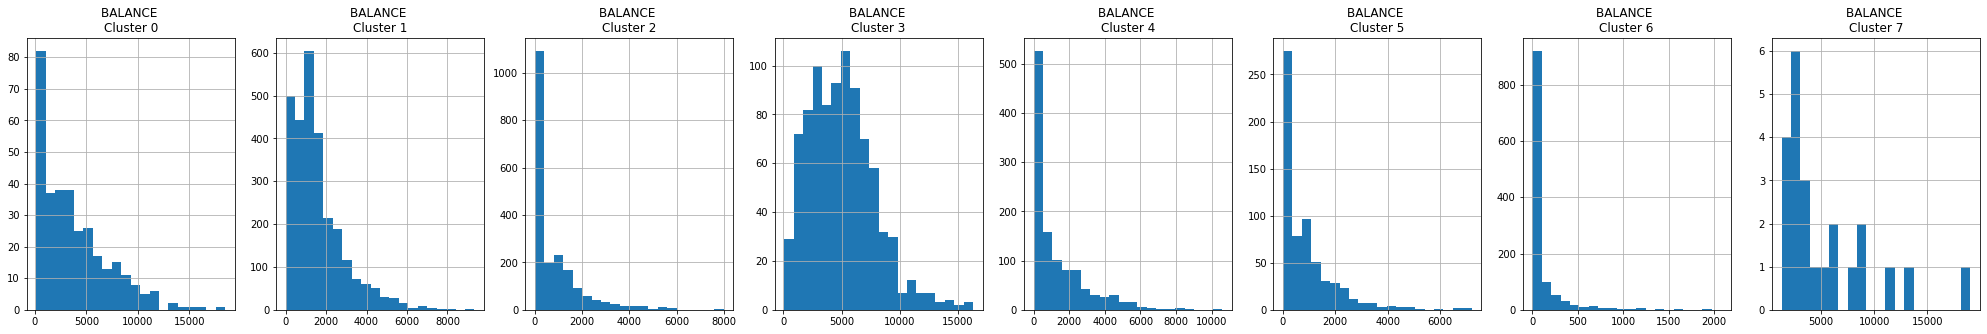

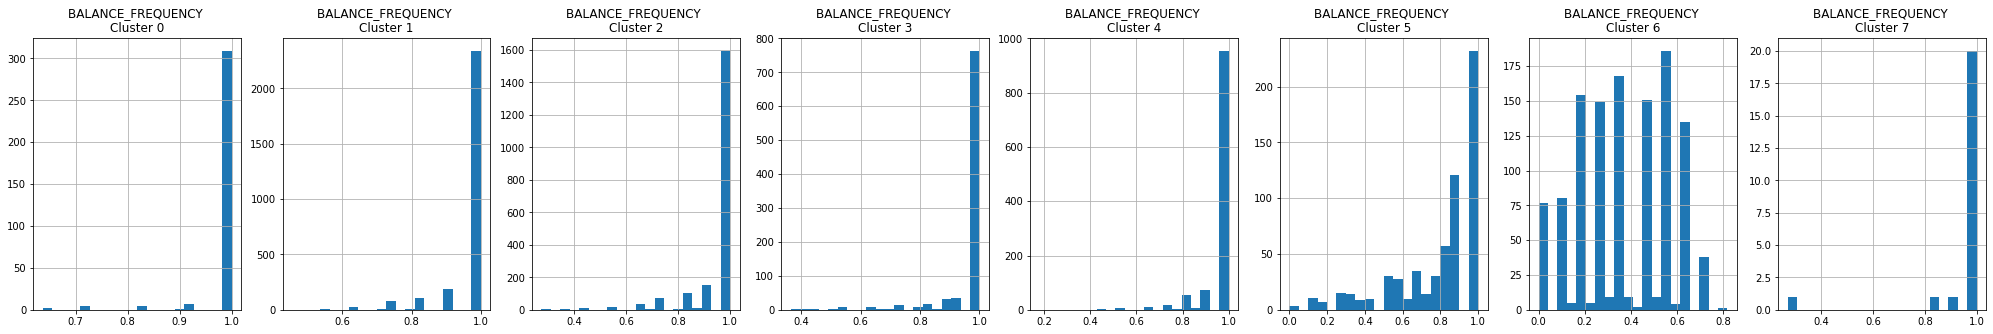

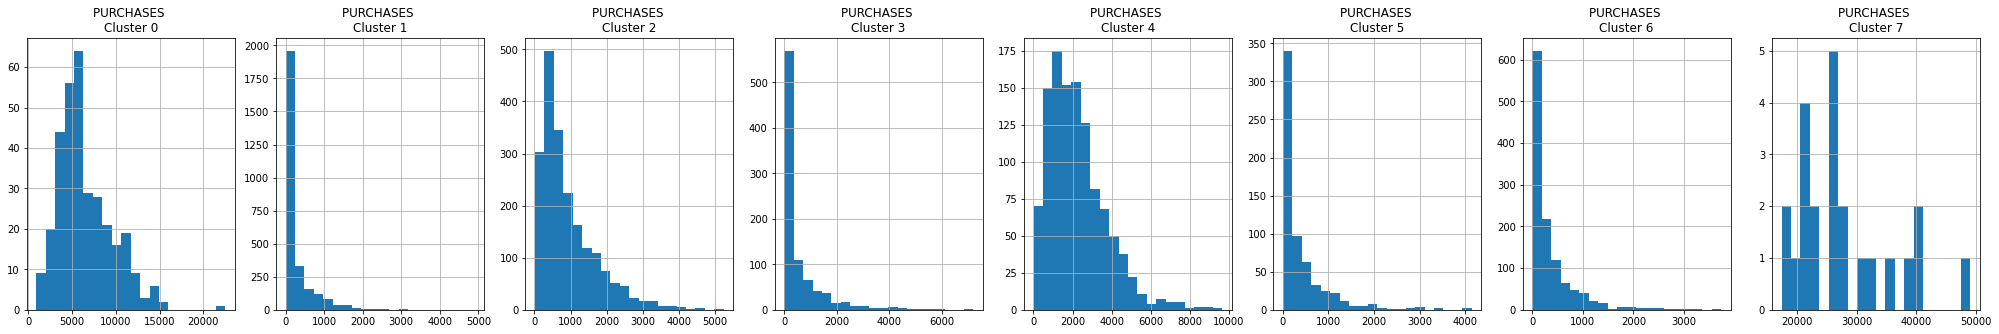

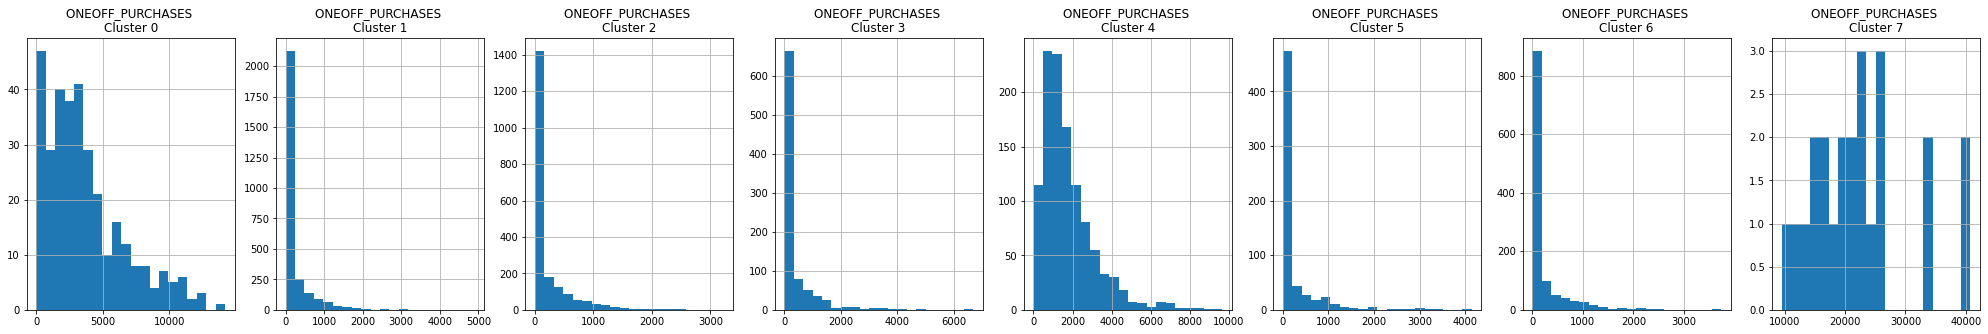

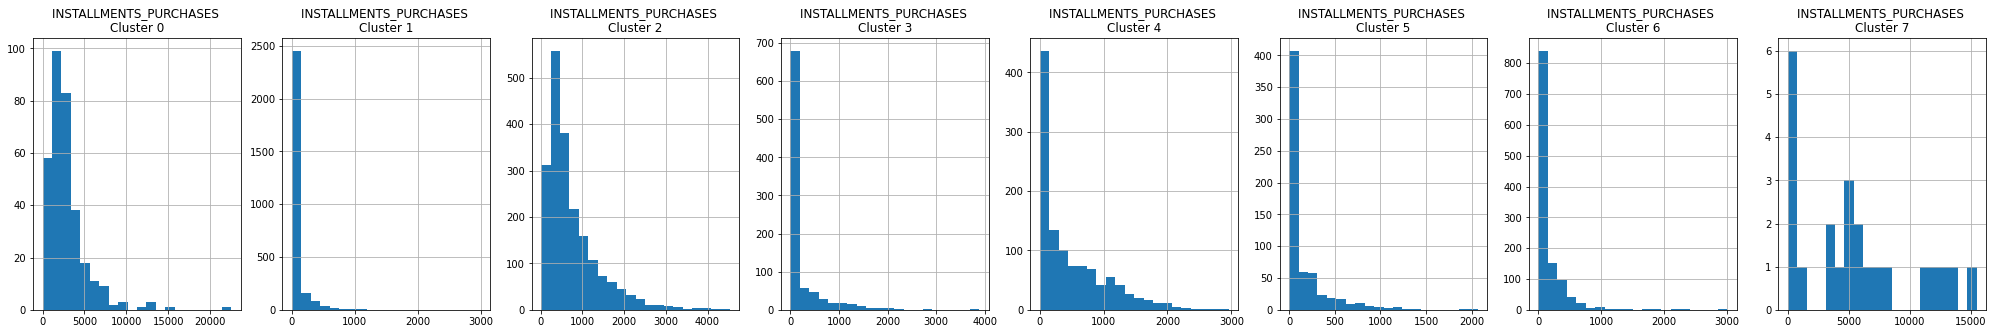

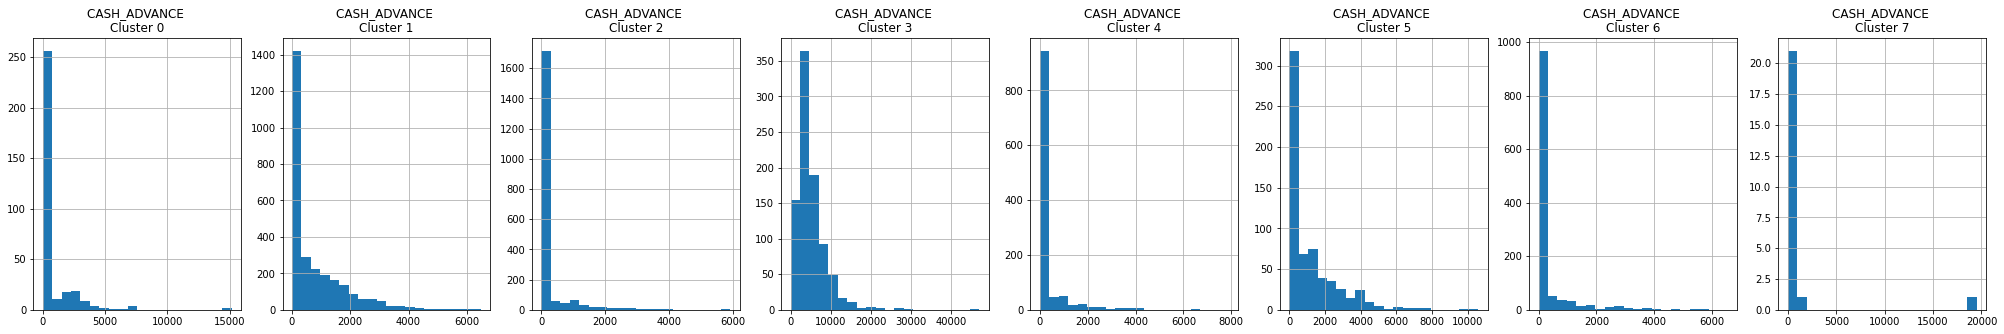

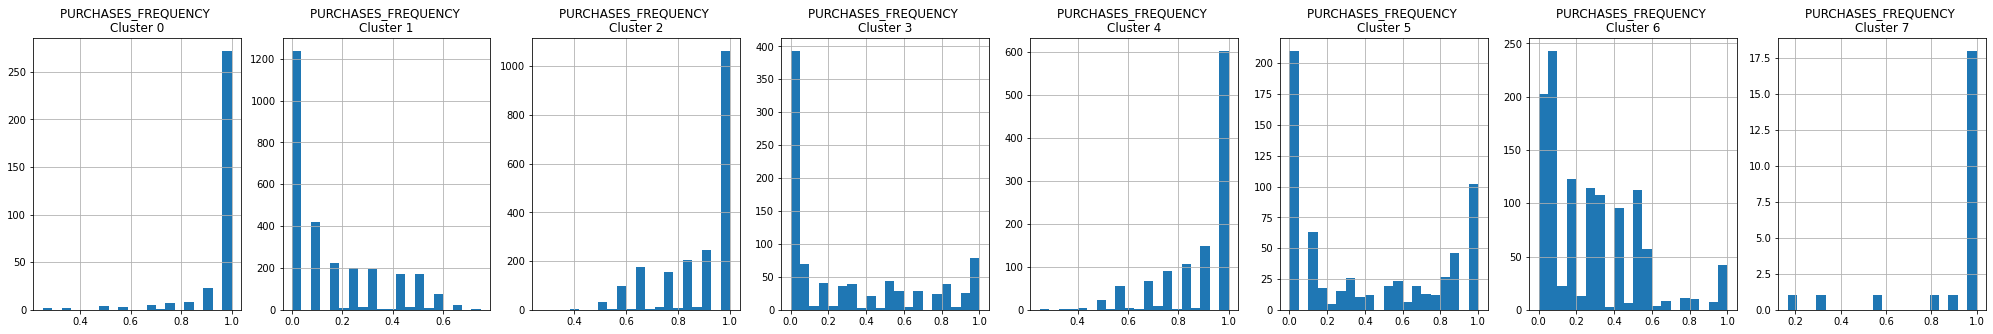

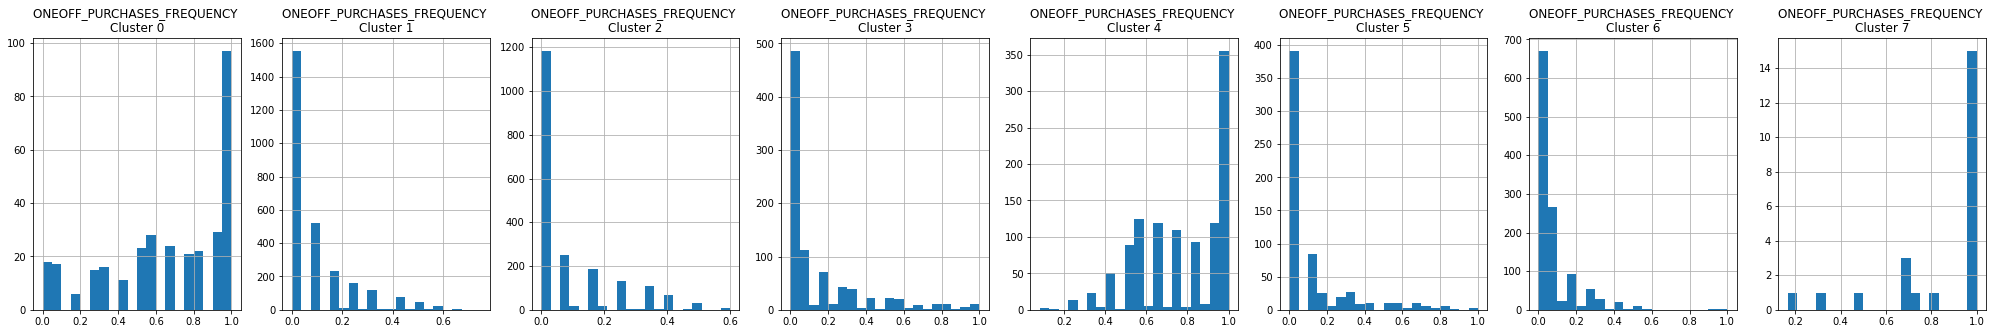

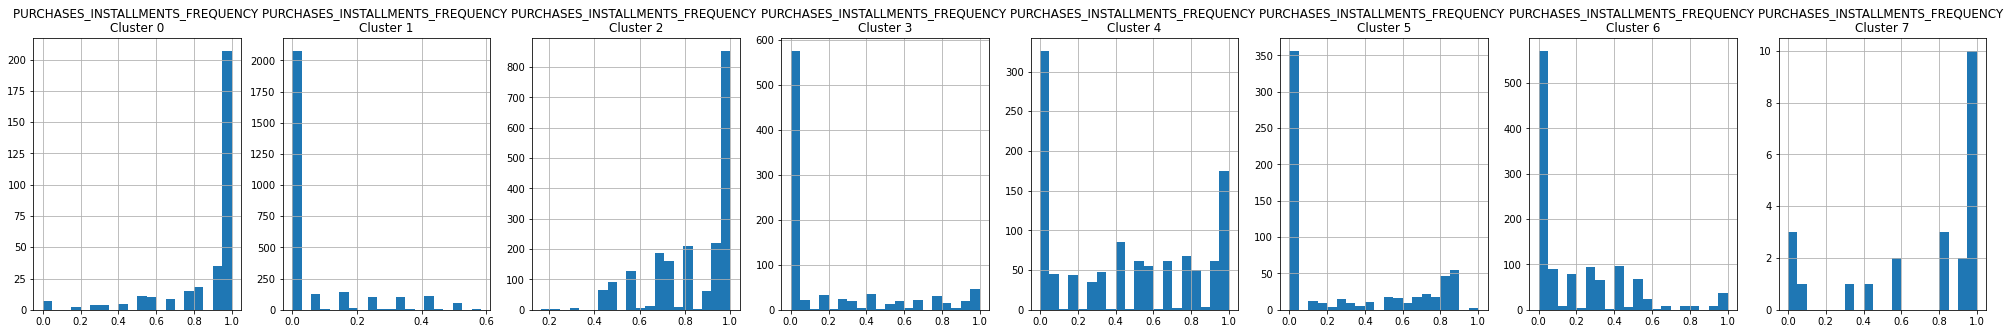

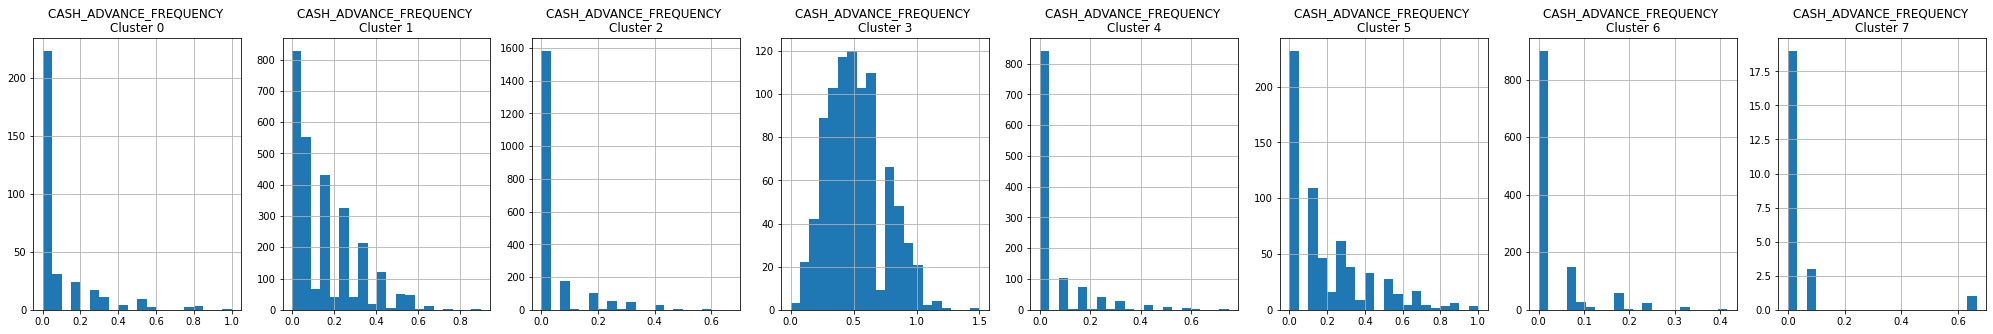

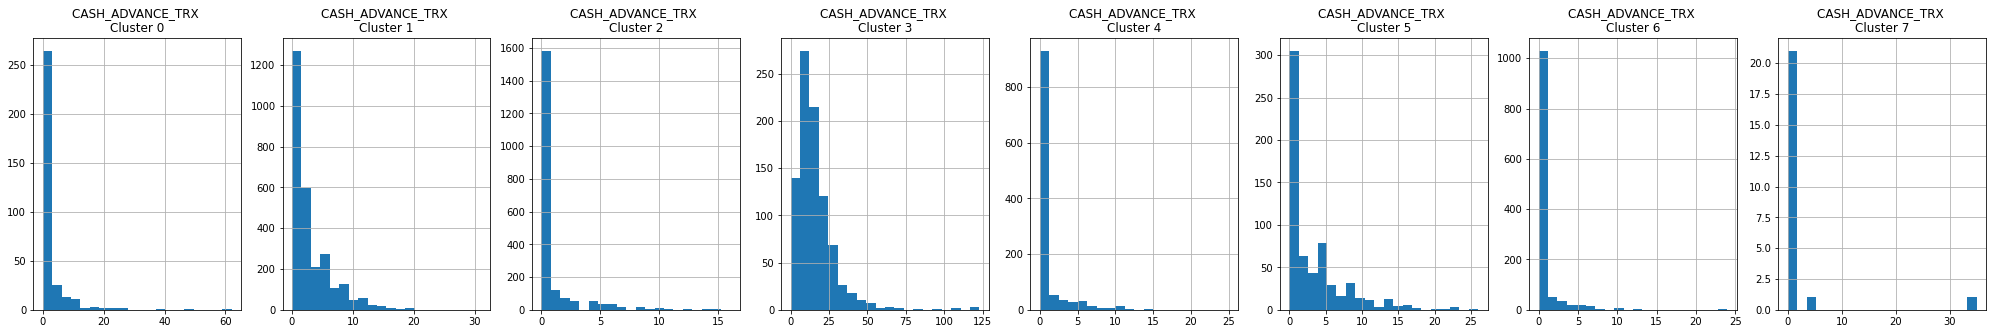

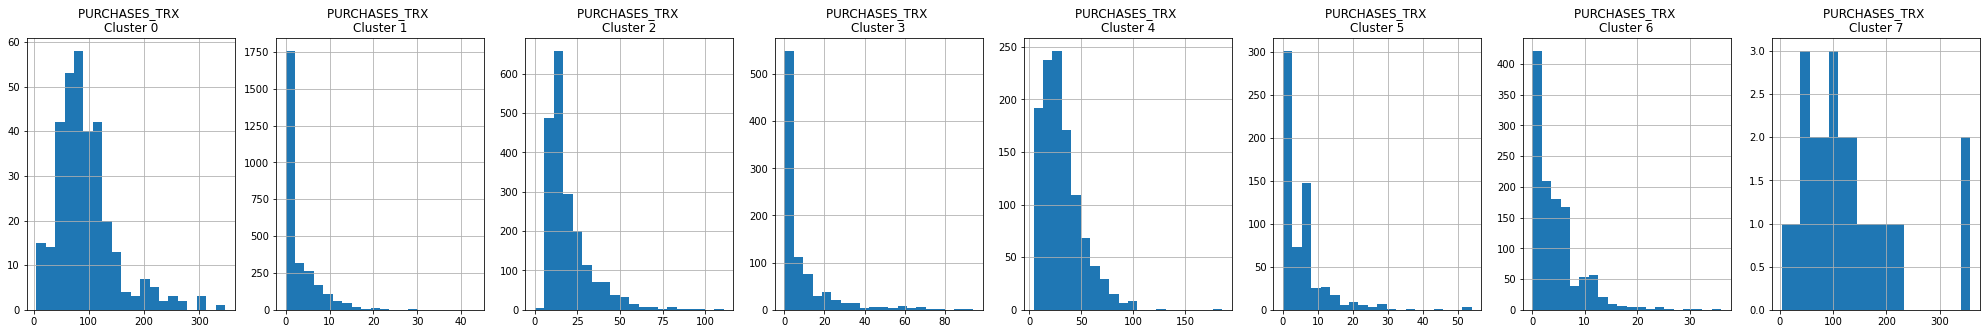

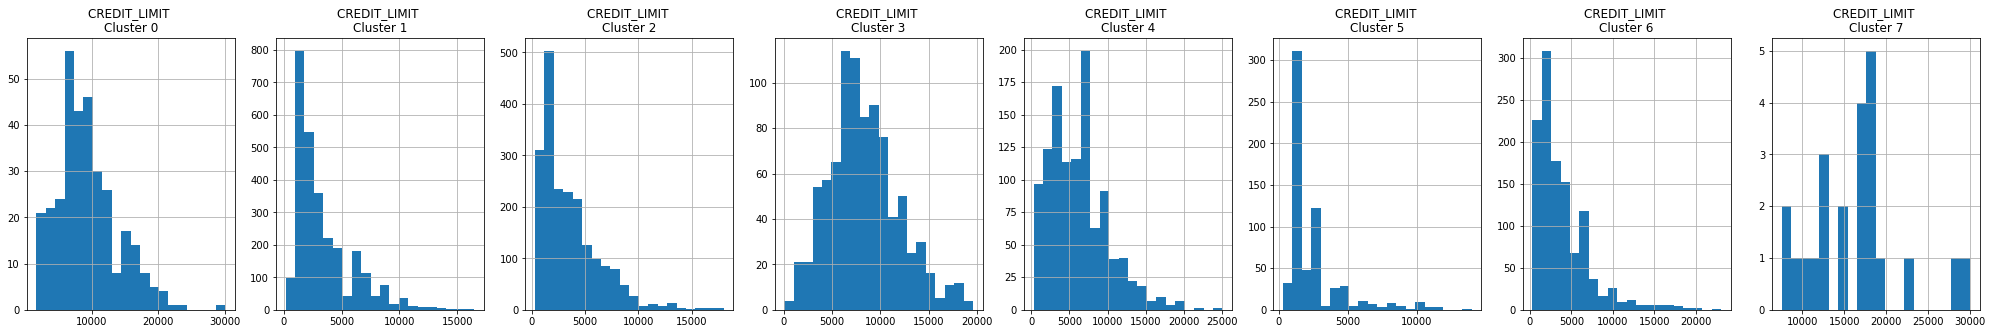

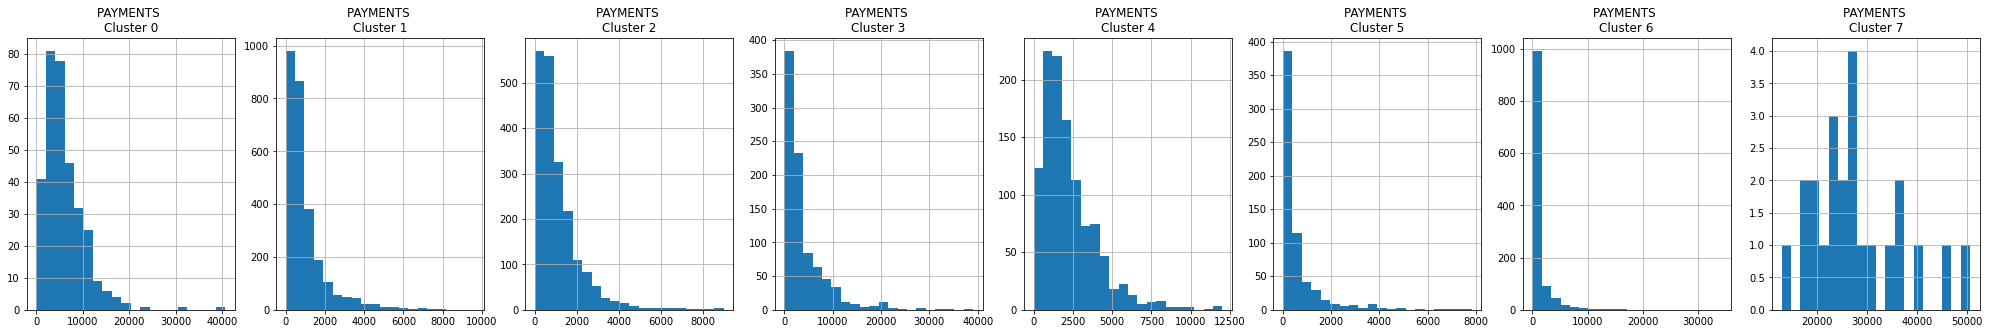

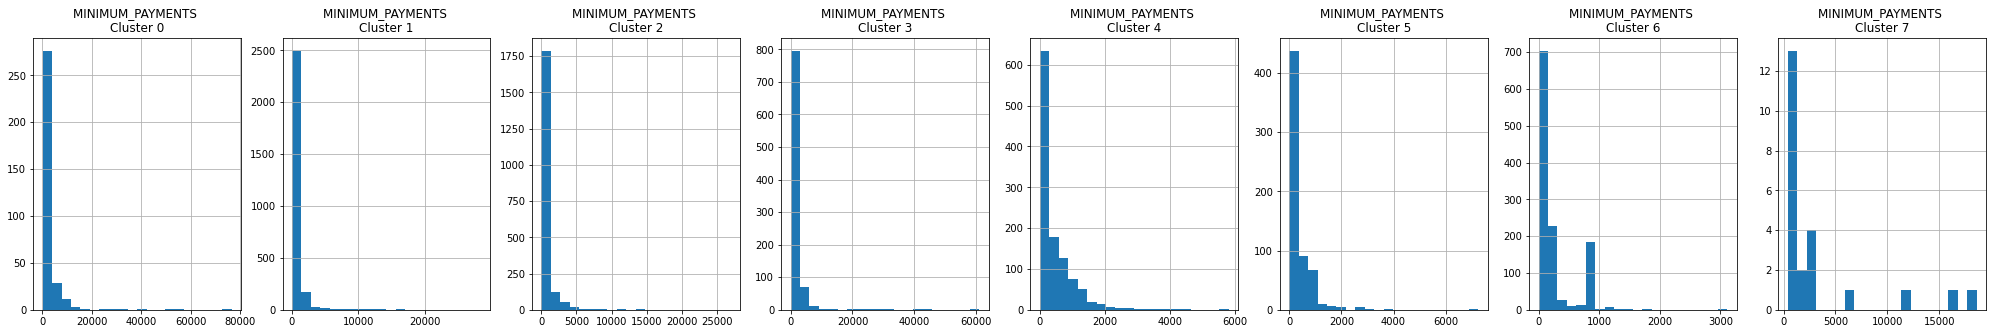

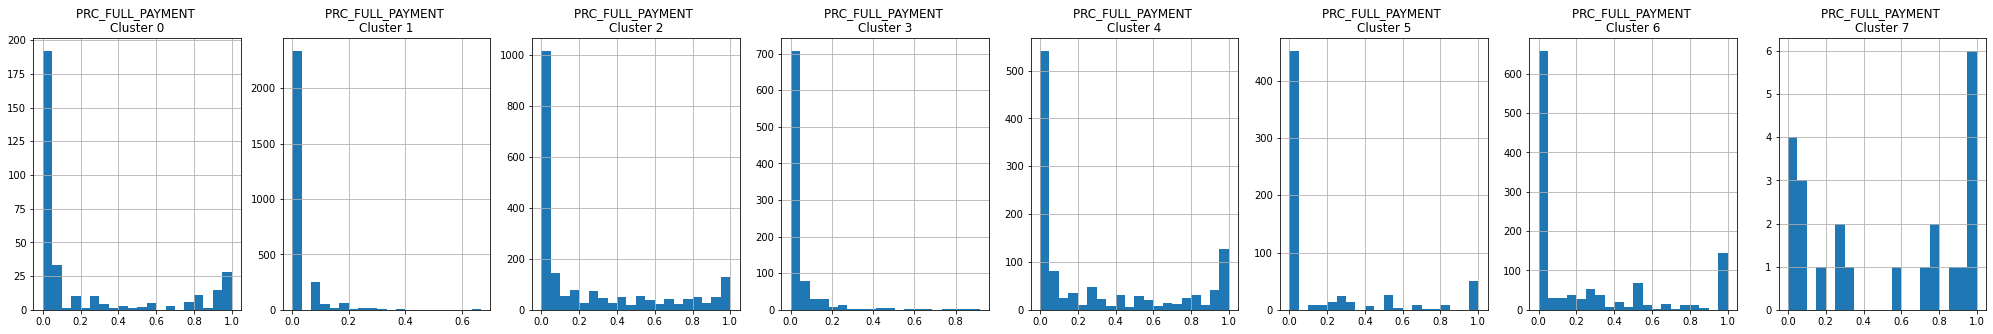

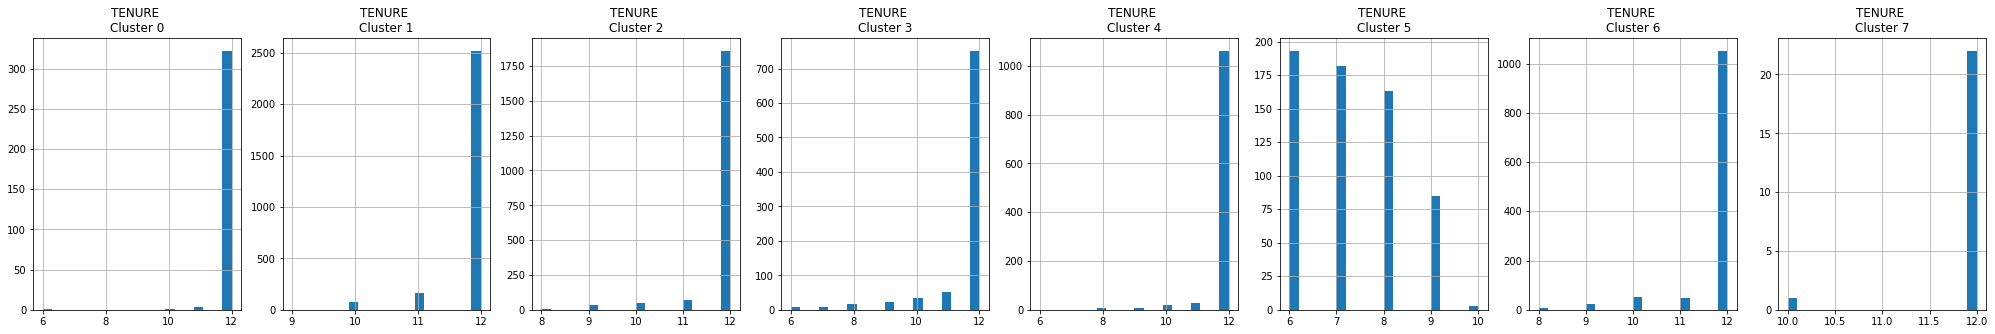

In [183]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [184]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5168,2002.429291,1.0,3500.03,1814.42,1685.61,0.000000,1.0,0.666667,1.000000,0.000000,0,129,6000.0,1619.627370,537.587864,0.000000,12,0
1991,1513.075264,1.0,15704.04,12618.86,3085.18,0.000000,1.0,0.916667,0.916667,0.000000,0,185,3000.0,14399.703180,310.712671,0.916667,12,0
6040,5366.532372,1.0,5251.08,2875.10,2375.98,744.096753,1.0,0.500000,0.916667,0.250000,3,44,11000.0,1429.348596,1660.393651,0.000000,12,0
3356,2962.757731,1.0,4398.65,300.00,4098.65,2483.768145,1.0,0.083333,1.000000,0.333333,9,47,3000.0,7109.795209,5114.110493,0.083333,12,0
4428,700.100691,1.0,7244.98,2457.47,4787.51,0.000000,1.0,0.833333,1.000000,0.000000,0,110,6200.0,6151.929937,197.284410,0.750000,12,0


In [185]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4282,2004.816462,1.0,20747.34,13007.07,7740.27,0.0,1.0,1.0,1.000000,0.0,0,95,10000.0,17005.40969,410.800069,1.000000,12,7
1585,8809.504736,1.0,25378.36,20646.07,4732.29,0.0,1.0,1.0,1.000000,0.0,0,136,14500.0,25825.32482,2921.628286,0.000000,12,7
941,2072.457624,1.0,17409.21,11263.17,6146.04,0.0,1.0,1.0,1.000000,0.0,0,175,19500.0,19517.16160,517.324081,0.333333,12,7
1256,4010.621974,1.0,40040.71,24543.52,15497.19,0.0,1.0,1.0,1.000000,0.0,0,358,18000.0,33994.72785,703.503256,1.000000,12,7
1447,8151.985277,1.0,25615.07,25122.77,492.30,0.0,1.0,1.0,0.583333,0.0,0,56,17000.0,17575.20083,2465.465414,0.166667,12,7


In [186]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [187]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222024, -1.0764531 ],
       [-1.1382948 ,  2.50647196],
       [ 0.96968404, -0.38352154],
       ...,
       [-0.92620363, -1.81078632],
       [-2.33655171, -0.65796505],
       [-0.55642226, -0.40046245]])

In [188]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138295,2.506472
2,0.969684,-0.383522
3,-0.873628,0.043158
4,-1.599434,-0.688580


In [189]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,1
1,-1.138295,2.506472,3
2,0.969684,-0.383522,4
3,-0.873628,0.043158,1
4,-1.599434,-0.688580,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

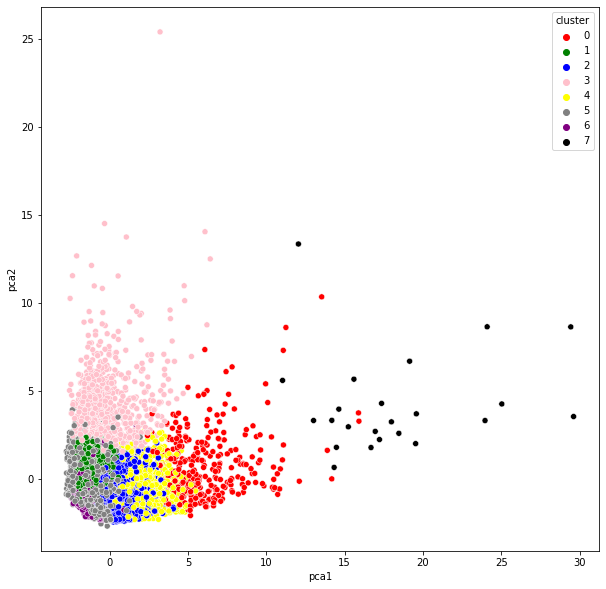

In [190]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [191]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [192]:
creditcard_df_scaled.shape

(8950, 17)

In [193]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [194]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [195]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [196]:
# encoder
encoder = Model(input_df, encoded)

In [197]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [198]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 4s 13ms/step - loss: 0.4151
Epoch 2/50
280/280 [==============================] - 4s 13ms/step - loss: 0.1257
Epoch 3/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0911
Epoch 4/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0935
Epoch 5/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0812
Epoch 6/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0709
Epoch 7/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0908
Epoch 8/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0630
Epoch 9/50
280/280 [==============================] - 3s 12ms/step - loss: 0.1007
Epoch 10/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0602
Epoch 11/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0589
Epoch 12/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0581
Epoch 13/50
2

In [199]:
creditcard_df_scaled.shape

(8950, 17)

In [200]:
compact = encoder.predict(creditcard_df_scaled)

In [201]:
compact.shape

(8950, 10)

In [202]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [203]:
compact[0]

array([2.6931808, 0.6989311, 0.       , 1.1344388, 0.       , 0.       ,
       0.       , 0.       , 0.7663658, 1.5203745], dtype=float32)

In [204]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

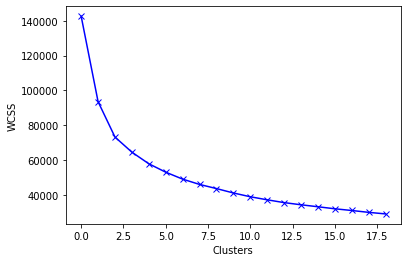

In [205]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

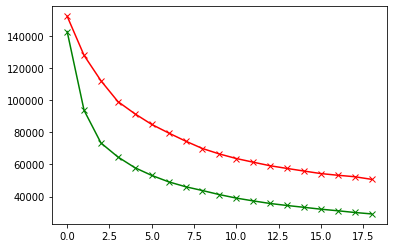

In [206]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [207]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [208]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 3, 1, ..., 3, 3, 3]), (8950,))

In [209]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [210]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.134741,-0.379157
1,1.769479,-1.845445
2,-2.690469,0.579132
3,0.259478,-0.272614
4,-1.768425,-0.398725


In [211]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.134741,-0.379157,1
1,1.769479,-1.845445,3
2,-2.690469,0.579132,1
3,0.259478,-0.272614,3
4,-1.768425,-0.398725,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

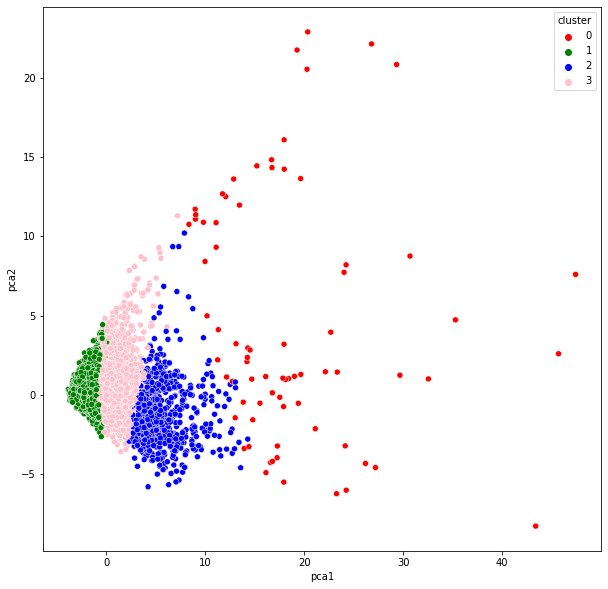

In [212]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [213]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5287,7268.706380,1.000000,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.000000,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,11,0
3698,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.823540,569.401398,0.727273,12,0
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.276620,534.032339,1.000000,12,0
1155,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,864.206542,0.000000,12,0
1560,2774.249582,1.000000,21802.60,21802.60,0.00,1771.824164,1.000000,1.000000,0.000000,0.083333,4,72,13000.0,22350.292470,562.887574,0.916667,12,0


In [214]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1553,21.664126,1.000000,271.86,30.00,241.86,0.000000,1.000000,0.083333,0.916667,0.000000,0,12,4000.0,263.919053,144.825209,0.777778,12,3
1547,8767.569300,1.000000,0.00,0.00,0.00,4582.065405,0.000000,0.000000,0.000000,0.250000,10,0,9000.0,1824.244866,2259.461833,0.000000,12,3
5977,538.468542,1.000000,0.00,0.00,0.00,1766.880842,0.000000,0.000000,0.000000,0.250000,8,0,8000.0,6313.310688,357.783692,0.100000,12,3
5980,333.085021,0.636364,980.00,980.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1000.0,1485.205378,163.396716,0.000000,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,3


In [215]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')